In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
im = np.asarray(Image.open("../../data/images/Lung_mask.tif"))


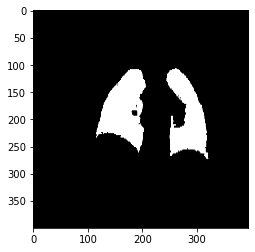

In [3]:
plt.imshow(im, vmin=0, vmax=1)

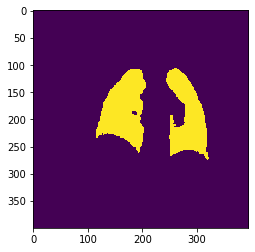

In [4]:
# making the greyscale segmentation a binary image, by setting all values below/above a threshold to 0/1
im2 = np.zeros(im.shape[0:2], dtype=im.dtype)
im2[im[:,:,0]>0.5] = 1
plt.imshow(im2, vmin=0, vmax=1)

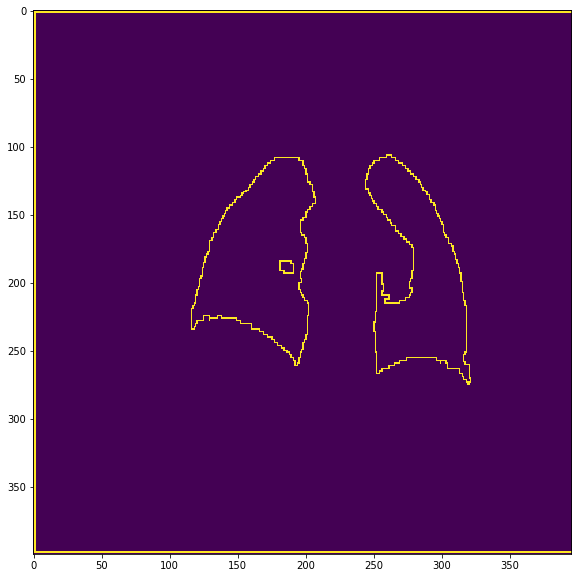

In [5]:
from scipy.ndimage.morphology import binary_dilation, binary_erosion

# dilation sets every pixel that is not completely surrounded by 1s to zero, so the boundary is removed
k = np.ones((3,3),dtype=int) 
out = binary_dilation(im2==0, k) & im2 

plt.figure(figsize=(10,10))
plt.imshow(out, vmin=0, vmax=1)

In [6]:
# remove the ones on the outer edges of image
out[0:2,:] = 0
out[:,0:2] = 0
out[-2, :] = 0
#remove the circle in left lung
out[180:195, 180:195] = 0

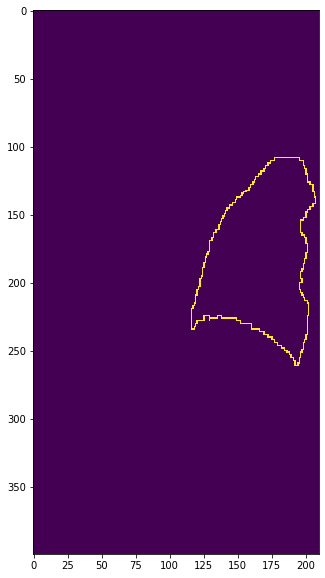

In [7]:

plt.figure(figsize=(10,10))
plt.imshow(out[:, :210], vmin=0, vmax=1)

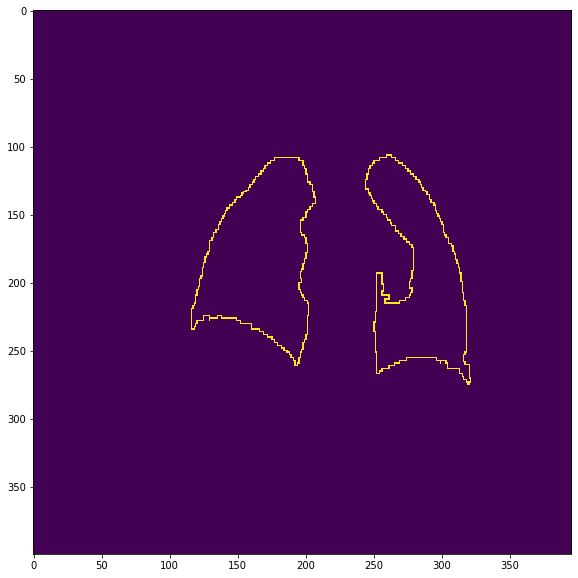

In [8]:

plt.figure(figsize=(10,10))
plt.imshow(out, vmin=0, vmax=1)

In [18]:
# extract points for left lung boundary
boundary0 = np.where(out[:,:210]==1)
out[:,:210] = 0
boundary1 = np.where(out==1)

In [20]:
from numpy import savetxt
savetxt('boundary0.csv', boundary0, delimiter=',')
savetxt('boundary1.csv', boundary1, delimiter=',')